In [1]:
import sys, os

sys.path.append('/cr/users/filip/bin')

from utils.binaries import *
from utils.plotting import *

from utils.Auger.SD import Monitoring

08:21:56 [INFO] utils          -- ( +1222ms) -- import logging
08:21:56 [INFO] utils.binaries -- (   +91ms) -- import numpy as np
08:21:56 [INFO] utils.binaries -- (    +9ms) -- import uncertainties
08:21:56 [INFO] utils.binaries -- (  +164ms) -- import pandas as pd
08:21:56 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
08:21:57 [INFO] utils.plotting -- (  +279ms) -- import matplotlib.pyplot as plt
08:21:57 [INFO] utils.plotting -- (  +327ms) -- import seaborn as so
08:21:57 [DBUG] utils.plotting -- (    +6ms) -- font size set to 9.5
08:21:57 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
08:21:57 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
08:21:57 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
08:21:57 [DBUG] utils.plotting -- (    +1ms) -- usetex set to False
08:21:57 [INFO] utils.plotting -- (    +2ms) -- import plotting.tools as plot


In [4]:
ssd_fmt = np.dtype(('<i4, (2049,)i2'))
ssd = np.fromfile('/cr/data02/AugerPrime/UUB/UubRandoms/2022_11/Peru/randoms0000.ssd', dtype=ssd_fmt)

wcd_fmt = np.dtype(('<i4, (2049,)i2', (3,)))
wcd = np.fromfile('/cr/data02/AugerPrime/UUB/UubRandoms/2022_11/Peru/randoms0000.wcd', dtype=wcd_fmt)

In [30]:
assert ssd[0][0] == wcd[0,0][0], 'Beggining of DAQ for WCD and SSD do not match up'
assert ssd[-1][0] == wcd[-1,0][0], 'End of DAQ for WCD and SSD do not match up'

t_begin, t_end = ssd[0][0], ssd[-1][0]

from datetime import datetime

daq_begin = datetime.fromtimestamp(t_begin)
daq_end = datetime.fromtimestamp(t_end)
print(daq_begin, daq_end)


2022-11-15 20:16:09 2022-11-15 20:16:59


In [2]:
M = Monitoring.Monit(2023, range(1, 13), 1)

08:22:13 [INFO] SD.Monitor     -- (+16201ms) -- received 12 file(s) as input
08:22:16 [INFO] SD.Monitor     -- ( +3026ms) -- View monit keys with self.keys()


In [3]:
t_vals = M('fTime', 699)
v_vals = M('fPeak', 1737)

08:22:19 [INFO] SD.Monitor     -- ( +2414ms) -- found 2584 entries for key fTime and station #699
08:22:20 [INFO] SD.Monitor     -- ( +1473ms) -- found 2374 entries for key fPeak and station #1737


In [ ]:
plt.scatter(t_vals, v_vals[:, 0])
plt.scatter(t_vals, v_vals[:, 1])
plt.scatter(t_vals, v_vals[:, 2])

In [ ]:
print(len(t_vals), len(v_vals))

In [38]:
indices = range(len(os.listdir('/cr/data02/AugerPrime/UUB/UubRandoms/2022_11/Peru/')) // 2)

In [41]:
print(indices[-1])

800


In [93]:
from datetime import timedelta

first_ssd_file = f'/cr/data02/AugerPrime/UUB/UubRandoms/2022_11/Peru/randoms{indices[0]:04}.ssd'
last_ssd_file = f'/cr/data02/AugerPrime/UUB/UubRandoms/2022_11/Peru/randoms{indices[-1]:04}.ssd'

first_ssd = np.fromfile(first_ssd_file, dtype=ssd_fmt)
DAQ_begin = datetime.fromtimestamp(first_ssd[0][0])
YYYY, MM, DD1 = [(DAQ_begin - timedelta(days=2)).__getattribute__(x) for x in ['year', 'month', 'day']]

last_ssd = np.fromfile(last_ssd_file, dtype=ssd_fmt)
DAQ_end = datetime.fromtimestamp(last_ssd[-1][0])               
DD2 = (DAQ_end + timedelta(days=2)).day                         # add 2 days since range is [low, high)

M = Monitoring.Monit(YYYY, MM, range(DD1, DD2))
t = M('fTime', 1737)
p = M('fPeak', 1737)


# def get_vem_approximate():


09:31:58 [INFO] SD.Monitor     -- (+48144ms) -- received 5 file(s) as input
09:32:00 [INFO] SD.Monitor     -- ( +1334ms) -- View monit keys with self.keys()
09:32:00 [INFO] SD.Monitor     -- (  +196ms) -- found 668 entries for key fTime and station #1737
09:32:00 [INFO] SD.Monitor     -- (  +543ms) -- found 668 entries for key fPeak and station #1737


401


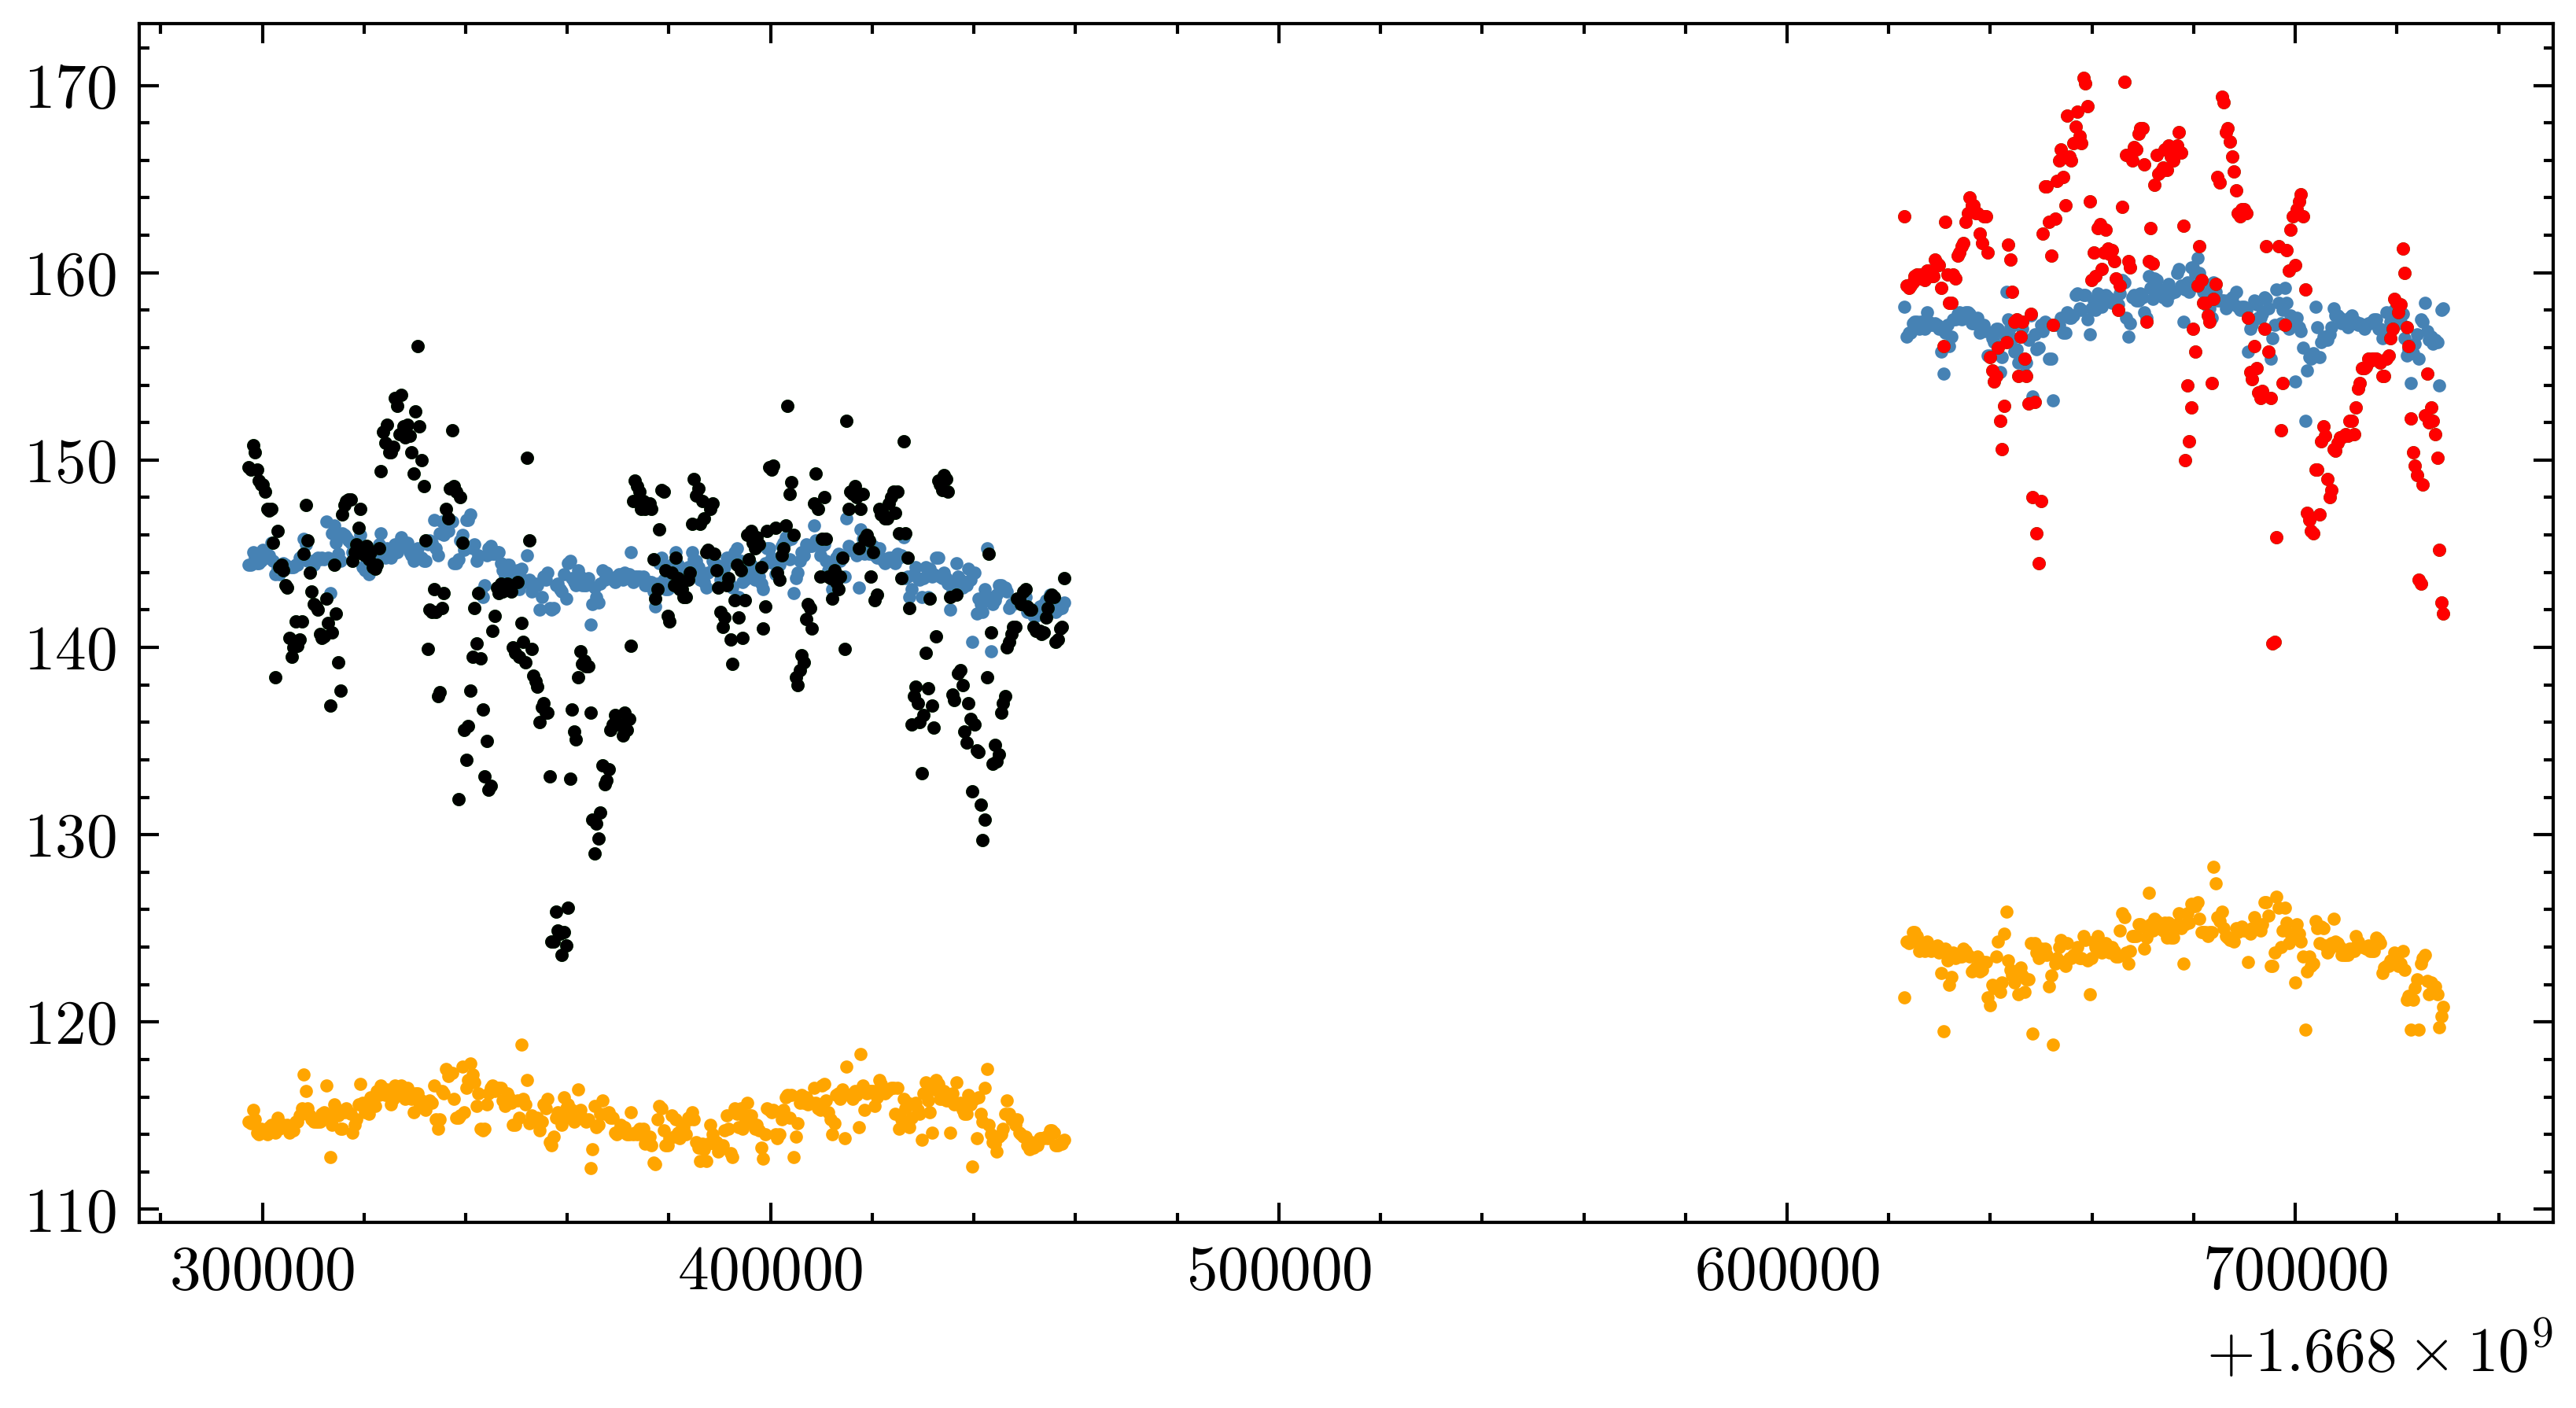

In [108]:
plt.scatter(t, p[:,0], s=1, c='steelblue')
plt.scatter(t, p[:,1], s=1, c='orange')
plt.scatter(t, p[:,2], s=1, c='green')

sort_list = np.argsort(t)
t, p = t[sort_list], p[sort_list]

cut_index = np.argmax(np.diff(t[:-1]))
print(cut_index)

# plt.axvline(t[cut_index + 1])
plt.scatter(t[:cut_index +1], p[:cut_index +1,2], s=1, c='black')
plt.scatter(t[cut_index +1:], p[cut_index +1:,2], s=1, c='red')
# plt.axvline(DAQ_begin)
# plt.axvline(DAQ_end)

In [62]:
print(YYYY, MM, DD1, DD2)

2022 11 15 16


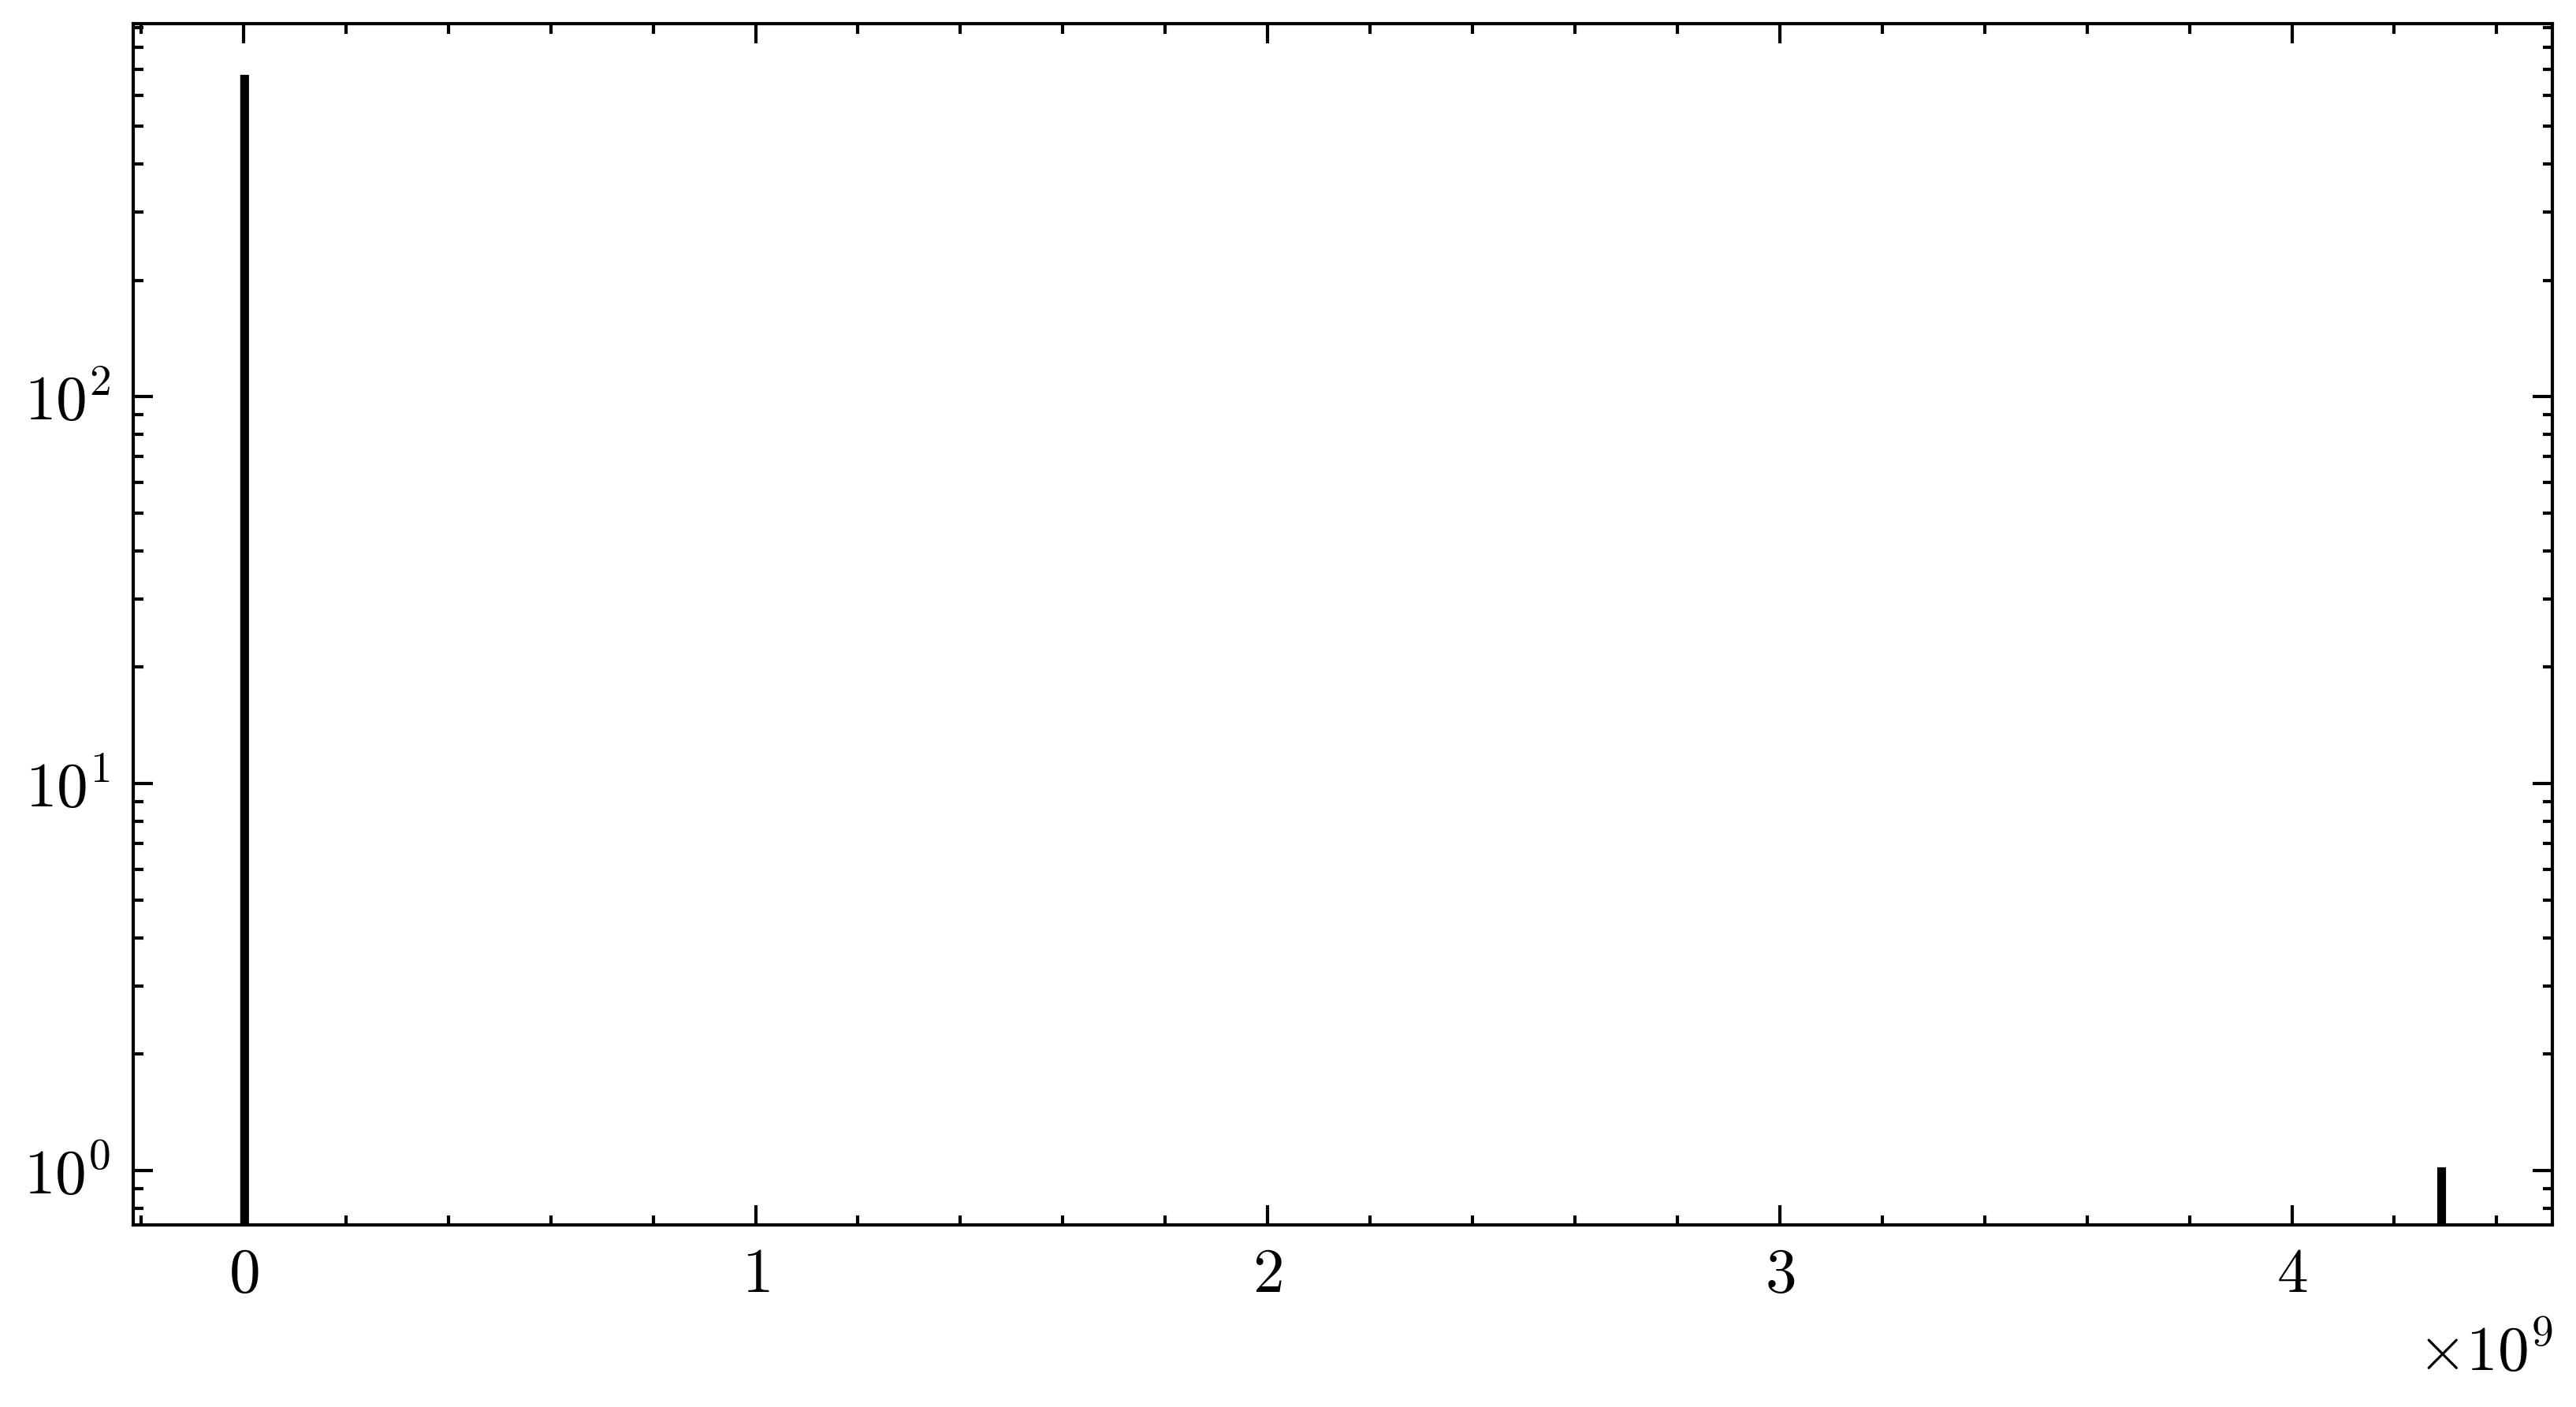

In [89]:
plt.hist(np.diff(t), bins=1000, histtype='step')
plt.yscale('log')